## Data Science Intern

### LGMVIP @ LetsGrowMore

### PRESENTED BY DHRUV PANCHAL

### Task 1: IRIS Flowers Classification ML Project (Level - Beginner)


### Step 0: Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

### Step 1: Loading the dataset


In [2]:
url='http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'

col_name = ['sepal-lenght','sepal-width','petal-lenght','petal-width','class']

dataset = pd.read_csv(url, names = col_name)


### Step 2: Summarize the Dataset


In [3]:
dataset.shape

(150, 5)

In [4]:
dataset.head()

,sepal-lenght,sepal-width,petal-lenght,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal-lenght  150 non-null    float64
 1   sepal-width   150 non-null    float64
 2   petal-lenght  150 non-null    float64
 3   petal-width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
dataset.describe()

,sepal-lenght,sepal-width,petal-lenght,petal-width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
dataset['class'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: class, dtype: int64

## Step 3: Data Visualization


### Violin plot


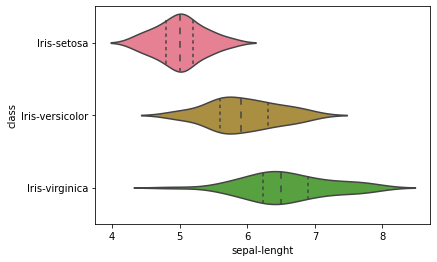

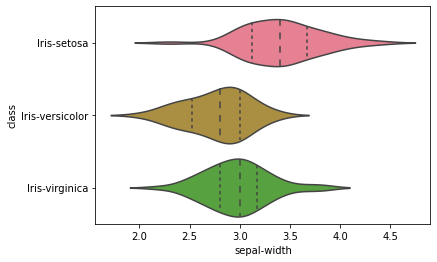

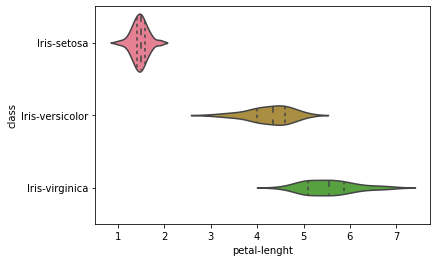

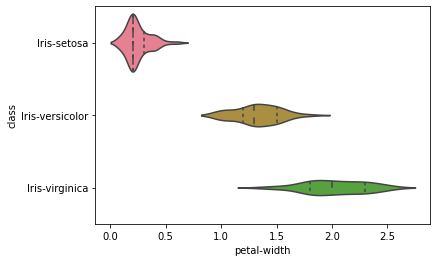

In [8]:
sns.violinplot(y='class', x='sepal-lenght', data=dataset, inner='quartile')
plt.show()
sns.violinplot(y='class', x='sepal-width', data=dataset, inner='quartile')
plt.show()
sns.violinplot(y='class', x='petal-lenght', data=dataset, inner='quartile')
plt.show()
sns.violinplot(y='class', x='petal-width', data=dataset, inner='quartile')
plt.show()

### Pair plot


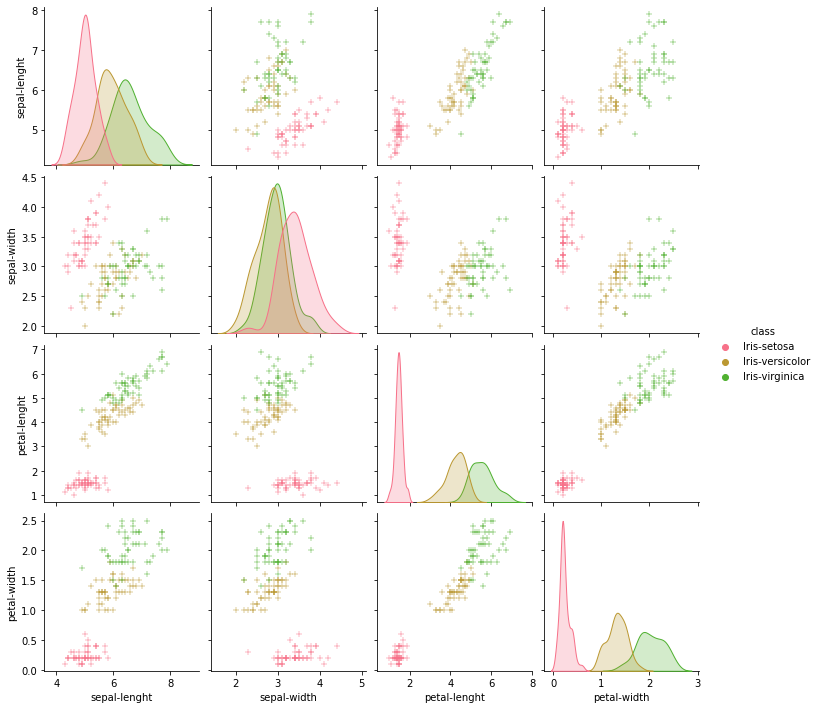

In [9]:
sns.pairplot(dataset, hue='class', markers='+')
plt.show()

### Heatmap


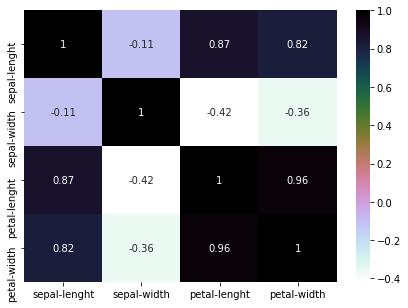

In [10]:
plt.figure(figsize=(7,5))
sns.heatmap(dataset.corr(), annot=True, cmap='cubehelix_r')
plt.show()

### Step 4: Model Building


### Splitting the dataset


In [11]:
X = dataset.drop(['class'], axis=1)
y = dataset['class']
print(f'X shape: {X.shape} | y shape: {y.shape} ')

X shape: (150, 4) | y shape: (150,) 


### Train Test split


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

### Model Creation


In [13]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVC', SVC(gamma='auto')))
# evaluate each model in turn
results = []
model_names = []
for name, model in models:
  kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
  cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
  results.append(cv_results)
  model_names.append(name)
  print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

C:\Python\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Python\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:

LR: 0.966667 (0.040825)
LDA: 0.975000 (0.038188)
KNN: 0.958333 (0.041667)
CART: 0.950000 (0.055277)
NB: 0.950000 (0.055277)
SVC: 0.983333 (0.033333)


In [14]:
model = SVC(gamma='auto')
model.fit(X_train, y_train)
prediction = model.predict(X_test)

1. Accuracy


In [15]:
print(f'SVC Test Accuracy: {accuracy_score(y_test, prediction)}')

SVC Test Accuracy: 0.9666666666666667


2. Confusion Metric


In [16]:
print(f"""
 Confusion Matrix: 
{confusion_matrix(y_test, prediction)}
""")


 Confusion Matrix: 
[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]



3. Classification Report


In [17]:
print(f'Classification Report: \n {classification_report(y_test, prediction)}')

Classification Report: 
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.86      1.00      0.92         6

       accuracy                           0.97        30
      macro avg       0.95      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30



## Thank You...